In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = "https://media.githubusercontent.com/media/sahrudaysherla/Zomato-Rating-Prediction/main/zomato.csv"
df = pd.read_csv(path)


In [ ]:
df.drop(["url","address","phone","dish_liked","reviews_list","listed_in(city)","menu_item"],axis=1, inplace=True)


We have in total 10 columns after dropping 7 redundent columns and they are as follows

 0.   name                         35011    object -> categorical, nomial, Polytomous
 1.   online_order                 35011    object -> categorical, nominal, Dichotomous
 2.   book_table                   35011    object -> categorical, nominal, Dichotomous
 3.   rate                         35011    object -> categorical, ordinal
 4.   votes                        35011    int64  -> numerical, discrete
 5.   location                     34997    object -> categorical, nominal, polytomous
 6.   rest_type                    34855    object -> categorical, nominal, polytomous
 7.   cuisines                     34978    object -> categorical, nominal, polytomous
 8.   approx_cost(for two people)  34790    object
 9.   listed_in(type)              35011    object -> categorical, nominal, polytomous

In [63]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()
df.isnull().sum()
features_NaN = [features for features in df.columns if df[features].isnull().sum()>1]
for feature in features_NaN:
    print(f"{feature} {np.round(df[feature].isnull().mean()*100, 4)} % missing valiues")
type(features_NaN)

location 0.04 % missing valiues
rest_type 0.4456 % missing valiues
cuisines 0.0943 % missing valiues
approx_cost(for two people) 0.6312 % missing valiues


list

## Handling Missing Values

In [81]:
df['online_order'].replace({'Yes':1, 'No':0}, inplace=True)
df['book_table'].replace({'Yes':1, 'No':0}, inplace=True)
df['rate'] = df['rate'].apply(lambda x: str(x).split('/')[0])
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: str(x).replace(",",""))
#df['rate'] = df['rate'].str.split('/').str[0]
for feature in features_NaN:
    print(f"Mode of {feature} is {df[feature].mode()}")
df['location'] = df['location'].fillna('BTM')
df['rest_type'] = df['rest_type'].fillna('Quick Bites')
df['cuisines'] = df['cuisines'].fillna('North Indian')
df.isnull().sum()

Mode of location is 0    BTM
Name: location, dtype: object
Mode of rest_type is 0    Quick Bites
Name: rest_type, dtype: object
Mode of cuisines is 0    North Indian
Name: cuisines, dtype: object
Mode of approx_cost(for two people) is 0    300
Name: approx_cost(for two people), dtype: object


name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [75]:
for feature in df.columns:
    with open("output.txt", "a") as f:
        print(f"Printing Unique values of {feature} in output.txt")
        print(f" {feature} has Unique values : {df[feature].unique()} \n", file=f)

Printing Unique values of name in output.txt
Printing Unique values of online_order in output.txt
Printing Unique values of book_table in output.txt
Printing Unique values of rate in output.txt
Printing Unique values of votes in output.txt
Printing Unique values of location in output.txt
Printing Unique values of rest_type in output.txt
Printing Unique values of cuisines in output.txt
Printing Unique values of approx_cost(for two people) in output.txt
Printing Unique values of listed_in(type) in output.txt


1. On taking look at output.txt it was found that rate has 2 wrong values i.e 'nan', '-' and 'NEW' 

need to replace them

In [79]:
df['rate'] = df['rate'].replace(to_replace='-',value =0)
df['rate'] = df['rate'].replace(to_replace='nan',value =0)
df['rate'] = df['rate'].replace(to_replace='NEW',value =0)
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

### Changing Types and Seperating Features

In [91]:
df['online_order'] = df['online_order'].astype(int)
df['book_table'] = df['book_table'].astype(int)
df['rate'] = df['rate'].astype(float)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(int)
numerical_features = [feature for feature in  df.columns if df[feature].dtypes != 'object']
categorical_features = [feature for feature in df.columns if feature not in numerical_features]
numerical_features, categorical_features
df.describe()

,online_order,book_table,rate,votes,approx_cost(for two people)
count,35011.000000,35011.000000,35011.000000,35011.000000,35011.00000
mean,0.594470,0.154294,3.187395,362.411785,591.71509
std,0.491001,0.361236,1.380741,940.156377,461.40161
min,0.000000,0.000000,0.000000,0.000000,40.00000
25%,0.000000,0.000000,3.200000,10.000000,300.00000
50%,1.000000,0.000000,3.700000,58.000000,450.00000
75%,1.000000,0.000000,4.000000,270.000000,700.00000
max,1.000000,1.000000,4.900000,16832.000000,6000.00000


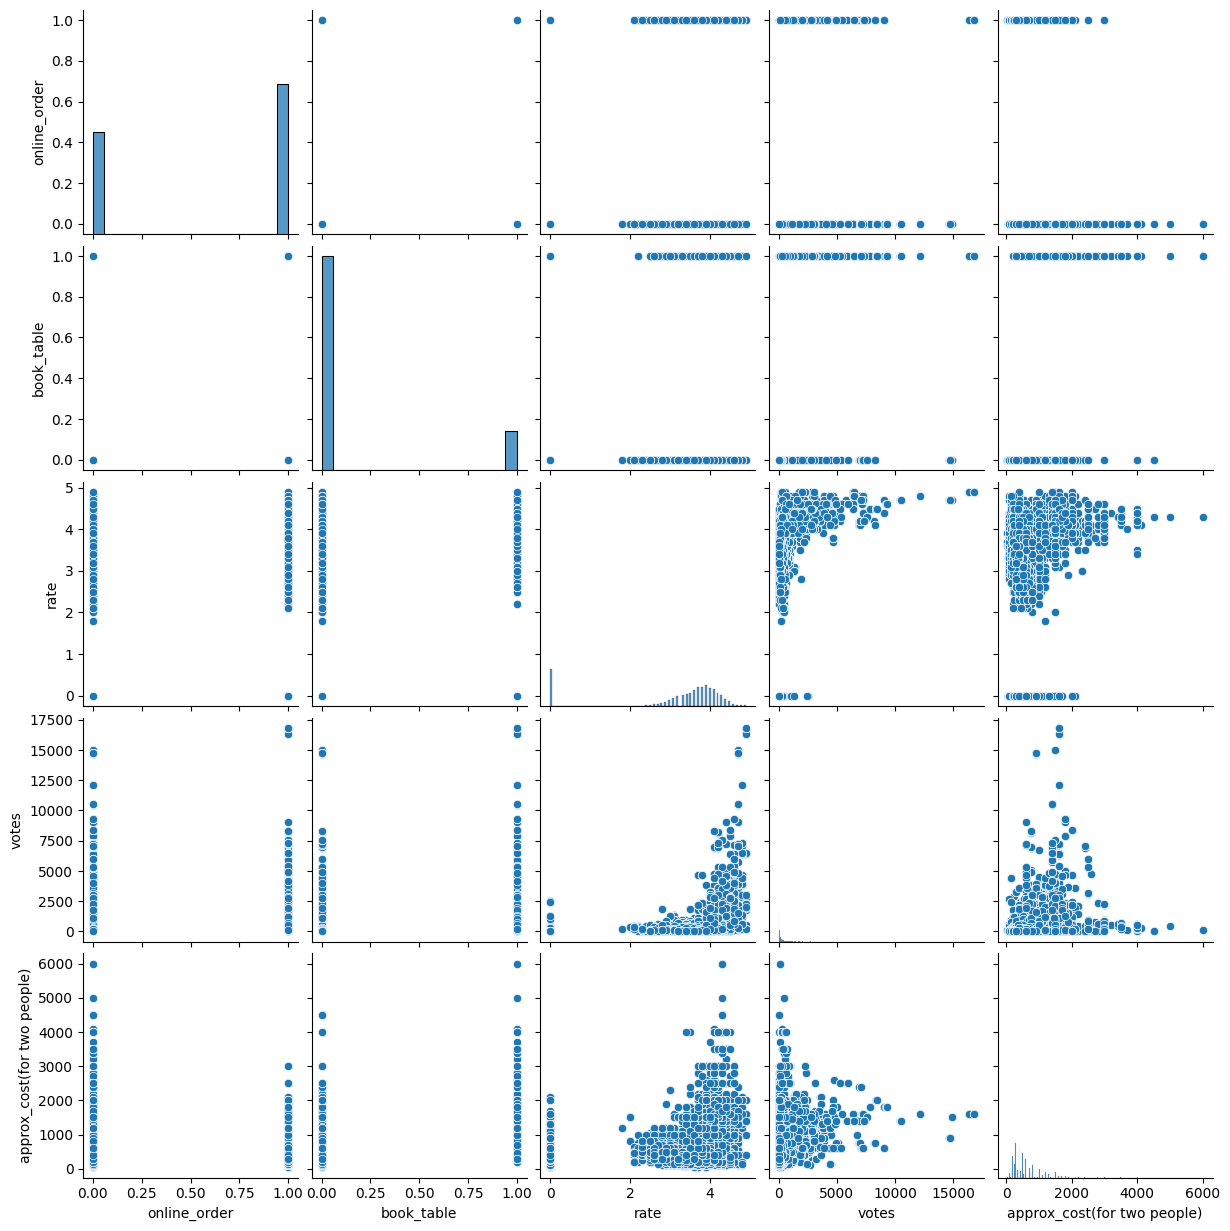

In [92]:
import seaborn as sns
sns.pairplot(df)